Akinde Kadjo

**Background:**

This dataset from [Kaggle](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset) contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. 

I will use hypothesis testing to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

# Imports and Data Loading

In [36]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
#Loading the data from the url
insurance_url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
insurance = pd.read_csv(insurance_url, sep=',', low_memory=False)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [6]:
#making a copy
df= insurance.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is  no missing data

In [8]:
#checking for duplicate 
df.duplicated().sum()

1

In [9]:
#dropping duplicates and checking again
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
#Identifying and addressing any inconsistencies in categorical values
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= sex
male      675
female    662
Name: sex, dtype: int64



- Column= smoker
no     1063
yes     274
Name: smoker, dtype: int64



- Column= region
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64





# Data Visualization

<AxesSubplot:xlabel='sex', ylabel='count'>

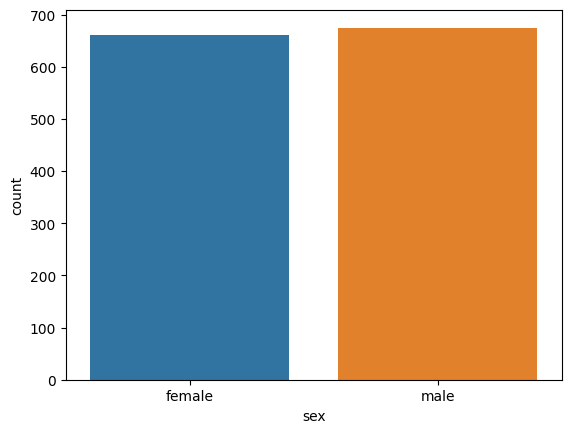

In [11]:
#What is the balance of Men to Women in our data set?
sns.countplot(x=df['sex'])

It seems pretty balanced

<AxesSubplot:xlabel='sex', ylabel='count'>

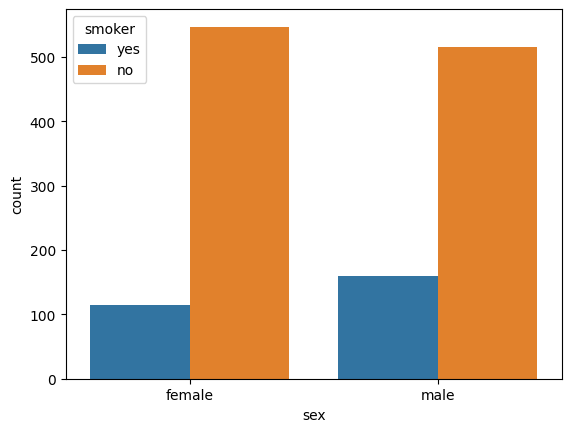

In [12]:
#Do men smoke more than women?
sns.countplot(data=df, x="sex", hue="smoker")

It seems yes , but Hypothesis testing will allow us to have a clearer answer

<AxesSubplot:xlabel='smoker', ylabel='charges'>

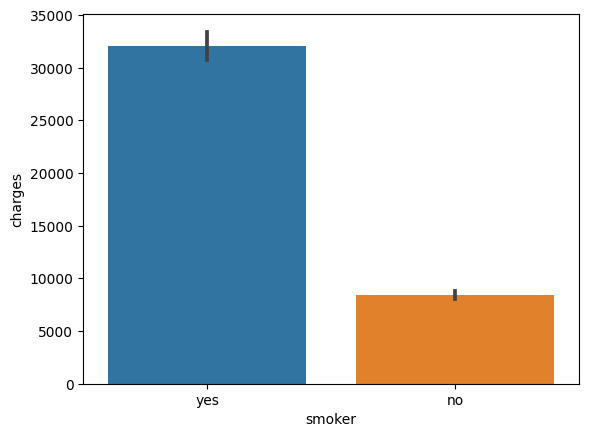

In [13]:
#Do smokers have higher insurance charges than non-smokers?
sns.barplot(data=df, x='smoker', y='charges')

This seems like a definite yes, it will be either confirmed or denied below with the hypothesis testing

<AxesSubplot:xlabel='region', ylabel='charges'>

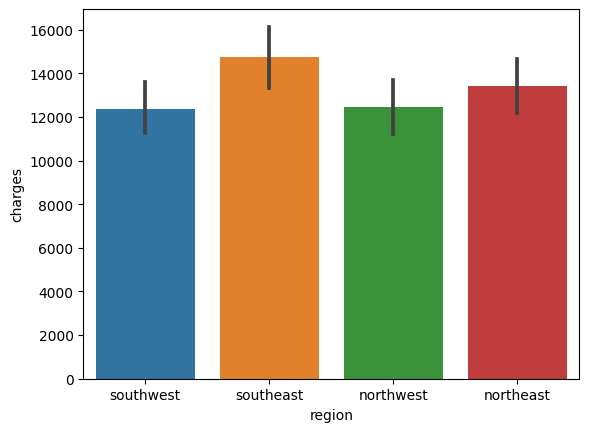

In [14]:
#Do different regions have different charges, on average?
sns.barplot(data=df, x='region', y='charges')

It seems like it. To be confirmed with hypothesis testing

# Hypothesis Testing

## Do smokers have higher insurance charges than non-smokers?

**Null Hypothesis:** Smokers and non-smokers have the same insurance charges.

**Alternative Hypothesis:** Smokers and non-smokers have different insurance charges.

**Alpha:** We will be using an alpha= 0.05

Smokers and non-smokers must be from different groups, so we will want to perform an independent t-test

In [17]:
#smoker df
smoker_df = df.loc[df['smoker']== 'yes']
smoker_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251


In [18]:
#non-smoker df
non_smoker_df = df.loc[df['smoker']== 'no']
non_smoker_df.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [21]:
#checking for outliers with z-scores > 3 for smokers
smoke = df['smoker']== 'yes'
zscores_s = stats.zscore(smoke)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [23]:
#checking for outliers with z-scores > 3 for non-smokers
no_smoke = df['smoker']== 'no'
zscores_ns = stats.zscore(no_smoke)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

0

In [31]:
# Test for equal variance
Var_smoker_result = stats.levene(smoker_df['charges'], non_smoker_df['charges'])
stat, p = levene(smoker_df['charges'], non_smoker_df['charges'])
if p > 0.05: 
    print(f'Both groups have equal variance')
else:
    print(f'Both groups do not have equal variance')
print(Var_smoker_result)

Both groups do not have equal variance
LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)


In [32]:
# Independent t-test with equal_var set to False
smoker_result = stats.ttest_ind(smoker_df['charges'], non_smoker_df['charges'], equal_var = False)
stat, p = stats.ttest_ind(smoker_df['charges'], non_smoker_df['charges'])
if p > 0.05: 
    print(f'Smokers and non-smokers have the same insurance charges')
else:
    print(f'Smokers and non-smokers have different insurance charges')
print(smoker_result) 

Smokers and non-smokers have different insurance charges
Ttest_indResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103)


## Are men more likely to smoke than women?

**Null Hypothesis:** Men and Women have the same likelihood of smoking.

**Alternative Hypothesis:** Men are more likely to smoke than women.

**Alpha:** We will be using an alpha= 0.05

I will run the Chi-Squared Test for this case

In [33]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [35]:
#run the chi test
chi2, p, deg_free, expected_vals = stats.chi2_contingency(table)
if p > 0.05: 
    print(f'Men and Women have the same likelihood of smoking')
else:
    print(f'Men are more likely to smoke than women')
print(p)

Men are more likely to smoke than women
0.0062765550120107375


## Do different regions have different charges, on average?

**Null Hypothesis:** On average, all regions have the same charges.

**Alternative Hypothesis:** On average, the regions have different charges.

**Alpha:** We will be using an alpha= 0.05

I'll use Tukey's Pairwise Multiple Comparisons Test

In [37]:
## save the values as charges and the labels for the regions
values = df['charges']
labels = df['region']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


On average all regions have different charges with the exception of a difference between southeast and the southwest region.